In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_excel("../data/raw/статья РКЖ new.xlsx")
df.head()

,Height,Weight,Body mass index,Body surface area,Hypertension,Diabetes,Smoker,Obesity,Dyslipidemia,Peripheral artery disease,...,IMM rest,LVEDV rest,LVESV rest,LVEDVi at rest,LVESVi at rest,LVEF% at rest,LAVI rest,E/e' rest,RVSP rest,FU1+2+3 coronary event (Death+AMI+ACS+Revasc)
0,162,69.0,26.291724,1.762101,1,0,Never,1,1.0,0.0,...,80.018114,65,17,36.887783,9.647574,73.846154,24.402687,5.090909,NaN,1
1,161,78.0,30.091432,1.867708,1,0,Never,2,1.0,0.0,...,87.272741,82,27,43.904078,14.456221,67.073171,NaN,NaN,NaN,1
2,173,72.0,24.056935,1.860108,0,0,current,0,1.0,1.0,...,91.930170,74,26,39.782646,13.977687,64.864865,23.116943,5.916667,NaN,0
3,164,68.0,25.282570,1.760051,1,0,Never,1,1.0,0.0,...,82.952165,76,28,43.180579,15.908634,63.157895,NaN,NaN,NaN,0
4,166,75.0,27.217303,1.859659,1,0,Never,1,1.0,0.0,...,73.669402,76,21,40.867697,11.292390,72.368421,NaN,NaN,NaN,1


In [37]:
df.isna().sum()

Height                                            0
Weight                                            0
Body mass index                                   0
Body surface area                                 0
Hypertension                                      0
Diabetes                                          0
Smoker                                            1
Obesity                                           0
Dyslipidemia                                      2
Peripheral artery disease                         4
Carotid artery disease                            1
Cholesterol                                      12
LPLD_Ch                                          36
LPHD_Ch                                          35
Trigliceride                                     15
Creatinine                                       11
Creatinine clearance                             24
Glukosa                                          11
ESC Pre-test Probability                          0
IMM rest    

In [38]:
df['Smoker'].value_counts()

Smoker
Never      157
current     35
Ex          17
Name: count, dtype: int64

In [39]:
smoke_mapping = {
    'Never': 0, 'current':1, 'Ex': 2
}
df['Smoker'] = df['Smoker'].map(smoke_mapping)
df['Smoker'].value_counts()

Smoker
0.0    157
1.0     35
2.0     17
Name: count, dtype: int64

In [42]:
df['Smoker'].value_counts()

Smoker
0.0    158
1.0     35
2.0     17
Name: count, dtype: int64

In [ ]:
df['Smoker'] = df['Smoker'].fillna(0)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(
    max_iter=10,
    random_state=42,
    verbose=2
)

df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(f"Пропусков после импутации: {df_imputed.isnull().sum().sum()}")

[IterativeImputer] Completing matrix with shape (210, 29)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.09
[IterativeImputer] Change: 66.29517787543129, scaled tolerance: 0.222 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.15
[IterativeImputer] Change: 4.928351060581662, scaled tolerance: 0.222 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.22
[IterativeImputer] Change: 3.8768306140936772, scaled tolerance: 0.222 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.29
[IterativeImputer] Change: 2.8124679197576654, scaled tolerance: 0.222 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.35
[IterativeImputer] Change: 2.013537744748504, scaled tolerance: 0.222 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.41
[IterativeImputer] Change: 1.4349445622525678, scaled tolerance: 0.222 
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.49
[IterativeImputer] Change: 1.021975013259179

c:\Users\Nikita Yevdokimov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [45]:
df_imputed.isna().sum()

Height                                           0
Weight                                           0
Body mass index                                  0
Body surface area                                0
Hypertension                                     0
Diabetes                                         0
Smoker                                           0
Obesity                                          0
Dyslipidemia                                     0
Peripheral artery disease                        0
Carotid artery disease                           0
Cholesterol                                      0
LPLD_Ch                                          0
LPHD_Ch                                          0
Trigliceride                                     0
Creatinine                                       0
Creatinine clearance                             0
Glukosa                                          0
ESC Pre-test Probability                         0
IMM rest                       

Text(0.5, 1.0, 'Корреляционная матрица')

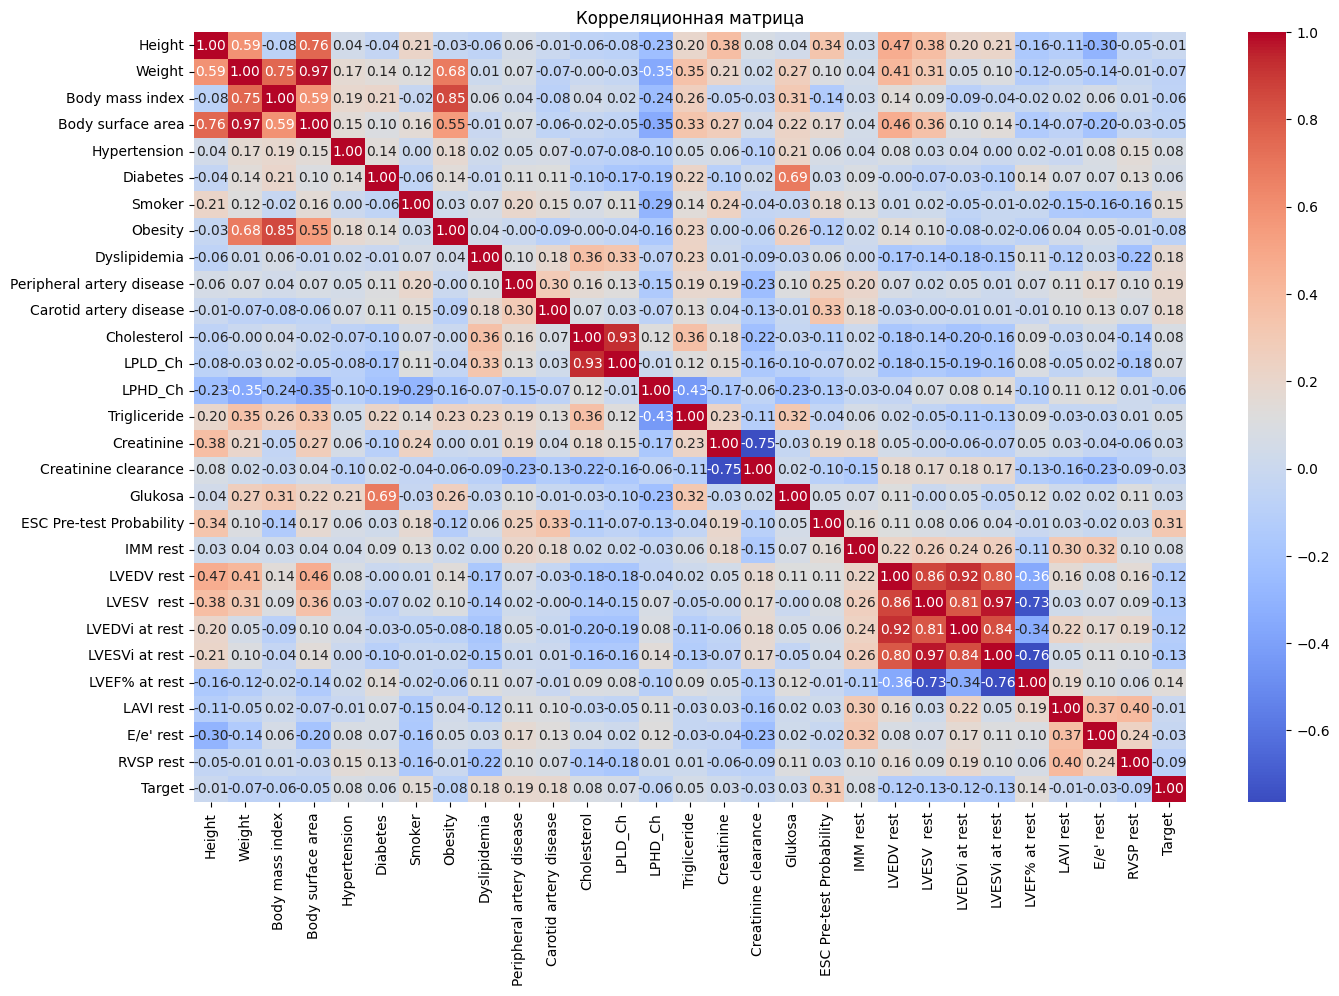

In [50]:
# df_imputed.rename(columns={'FU1+2+3 coronary event (Death+AMI+ACS+Revasc)': 'Target'}, inplace=True)

plt.figure(figsize=(16, 10))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
